In [1]:
!pip install earthpy

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.1MB 1.3MB/s 
     |████████████████████████████████| 972kB 47.2MB/s 
     |████████████████████████████████| 10.9MB 9.8MB/s 
     |████████████████████████████████| 14.8MB 317kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=5577fa873cc50db932ab71e89724b05b945bedffa32b69eea6be14ab37638b99
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [2]:
!pip install rasterio

In [3]:
import rasterio as rio
import numpy
import earthpy.plot as ep
from rasterio.plot import show
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.preprocessing import minmax_scale
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/NASA SPACE APP

/content/drive/My Drive/NASA SPACE APP


In [6]:
all_sentinel_bands = glob(
    "harsha_lake/*B*.jp2")

all_sentinel_bands.sort()
all_sentinel_bands

['harsha_lake/T16SGJ_20160808T162342_B01.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B02.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B03.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B04.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B05.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B06.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B07.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B08.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B09.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B8A.jp2']

In [7]:
# run once, only to generate the RGB composite image.
b4 = rio.open(all_sentinel_bands[3])
b3 = rio.open(all_sentinel_bands[2])
b2 = rio.open(all_sentinel_bands[1])


# Create an RGB image 
with rio.open('AlgaeBloomBands/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b2.read(1),3) 
    rgb.close()

. This software
package contains a continually growing list of satellite-derived algorithms
for the detection and quantification of the following three common water
quality proxies: chlorophyll, turbidity, and phycocyanin

In [8]:
#get the shape of RGB image created
with rio.open('AlgaeBloomBands/RGB.tiff') as rgb_f:
  data = rgb_f.read()

data.shape

(3, 10980, 10980)

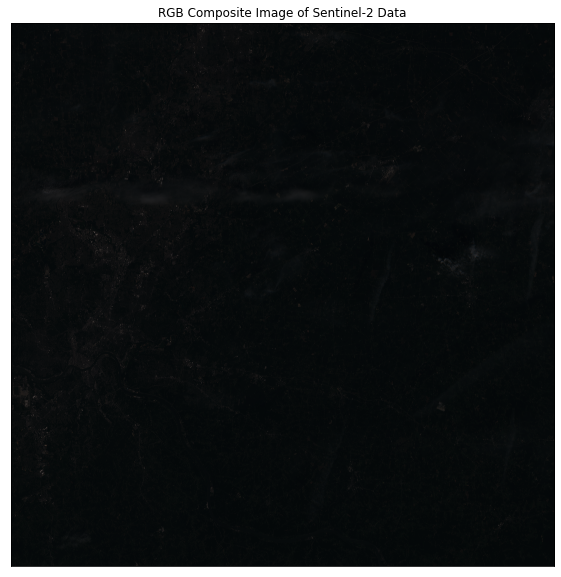

In [9]:
#plot rgb
ep.plot_rgb(data, rgb=(0,1,2), title='RGB Composite Image of Sentinel-2 Data')

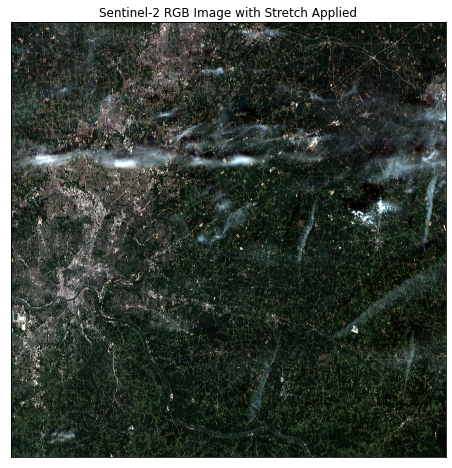

In [10]:
#rgb with stretch
ep.plot_rgb(
    data,
    rgb=(0,1,2),
    stretch=True,
    str_clip=0.5,
    figsize=(8,8),
    title="Sentinel-2 RGB Image with Stretch Applied",
)

plt.show()

 *Al10SABI* 
 
 chlorophyll


(w857 - w644) / (w458 +
w529)


 chlorophyll-a is used as the measure of chlorophyll
because it is the ubiquitous photosynthetic pigment found in both toxic
and non-toxic algal species, and it is helpful for the detection of blooming
conditions as well as blooms containing mixed algae species

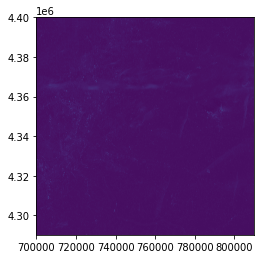

In [11]:
img2_458 = rio.open(all_sentinel_bands[1])
show(img2_458)

In [12]:
array458=img2_458.read()
array458.shape

(1, 10980, 10980)

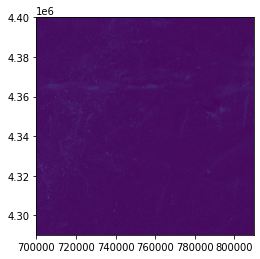

In [13]:
img3_529 = rio.open(all_sentinel_bands[2])
show(img3_529)

In [14]:
array529=img3_529.read()
array529.shape

(1, 10980, 10980)

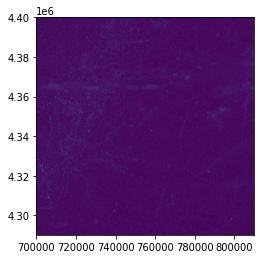

In [15]:
img4_644 = rio.open(all_sentinel_bands[3])
show(img4_644)

In [16]:
array644=img4_644.read()
array644.shape

(1, 10980, 10980)

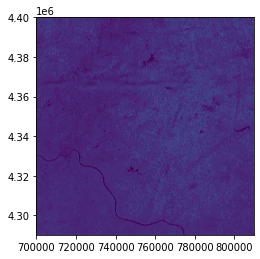

In [17]:
img8_857 = rio.open(all_sentinel_bands[7])
show(img8_857)

In [18]:
array857=img8_857.read()
array857.shape

(1, 10980, 10980)

In [19]:
chlorophylla=[(array857[i] - array644[i])/(array458[i] + array529[i]) for i in range(len(array857))]

In [20]:
cha=numpy.array(chlorophylla)

In [21]:
cha.shape

(1, 10980, 10980)

In [22]:
min=numpy.amin(cha)
min

0.0

In [23]:
max=numpy.amax(cha)
max

56.57772020725388

In [24]:
cha

array([[[1.76074661, 1.91268917, 2.04141291, ..., 1.21226142,
         1.19078591, 1.1862851 ],
        [1.80136596, 1.94294118, 2.03642987, ..., 1.26355748,
         1.25402793, 1.27627302],
        [1.96802842, 2.02884615, 1.96863905, ..., 1.47738981,
         1.38590786, 1.37732749],
        ...,
        [1.52547981, 1.33247588, 1.4921466 , ..., 2.05048409,
         2.20454545, 2.35138889],
        [1.44204852, 1.55123217, 1.56518905, ..., 2.1056683 ,
         2.13541667, 2.25445816],
        [1.77942122, 1.69949495, 1.69936306, ..., 2.18150449,
         2.37168759, 2.35607094]]])

In [25]:
cha_hl=[]

In [26]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      cha_hl.append(cha[i][k][4500:5500])

In [27]:
cha_hl_arr=numpy.array(cha_hl)
cha_hl_arr

array([[1.72686662, 1.62949195, 1.64853301, ..., 0.15015773, 0.17875989,
        0.6971877 ],
       [1.80433437, 1.66918239, 1.68514978, ..., 0.62354384, 0.1533123 ,
        0.19947507],
       [1.60260384, 1.63822963, 1.64447236, ..., 1.39948947, 0.55784373,
        0.21996186],
       ...,
       [1.94522378, 1.94133513, 1.60658083, ..., 2.05588429, 1.87827841,
        1.82083333],
       [1.89432624, 1.75799419, 1.6952177 , ..., 2.07661823, 2.01377953,
        1.90771259],
       [2.11977321, 2.04329897, 1.9103079 , ..., 1.89855072, 1.91911765,
        1.84819605]])

In [28]:
for i in range(len(cha_hl_arr)):
  for j in range(len(cha_hl_arr[i])):
    cha_hl_arr[i][j]=cha_hl_arr[i][j]/max

In [29]:
cha_hl_arr

array([[0.03052203, 0.02880095, 0.02913749, ..., 0.00265401, 0.00315955,
        0.01232265],
       [0.03189125, 0.02950247, 0.02978469, ..., 0.01102101, 0.00270976,
        0.00352568],
       [0.02832571, 0.02895538, 0.02906572, ..., 0.0247357 , 0.00985978,
        0.00388778],
       ...,
       [0.03438145, 0.03431271, 0.028396  , ..., 0.03633735, 0.0331982 ,
        0.03218287],
       [0.03348184, 0.0310722 , 0.02996264, ..., 0.03670382, 0.03559315,
        0.03371844],
       [0.03746657, 0.0361149 , 0.03376431, ..., 0.03355651, 0.03392002,
        0.0326665 ]])

In [30]:
cha_hl_arr.shape

(500, 1000)

In [31]:
harshalake=[cha_hl_arr]
harshalake=numpy.array(harshalake)
harshalake

array([[[0.03052203, 0.02880095, 0.02913749, ..., 0.00265401,
         0.00315955, 0.01232265],
        [0.03189125, 0.02950247, 0.02978469, ..., 0.01102101,
         0.00270976, 0.00352568],
        [0.02832571, 0.02895538, 0.02906572, ..., 0.0247357 ,
         0.00985978, 0.00388778],
        ...,
        [0.03438145, 0.03431271, 0.028396  , ..., 0.03633735,
         0.0331982 , 0.03218287],
        [0.03348184, 0.0310722 , 0.02996264, ..., 0.03670382,
         0.03559315, 0.03371844],
        [0.03746657, 0.0361149 , 0.03376431, ..., 0.03355651,
         0.03392002, 0.0326665 ]]])

In [32]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()


In [33]:
numpy.amin(harshalake)

0.0

In [34]:
numpy.amax(harshalake)

0.8481833169044123

Chlorophyll Values Shape:  (1, 500, 1000)


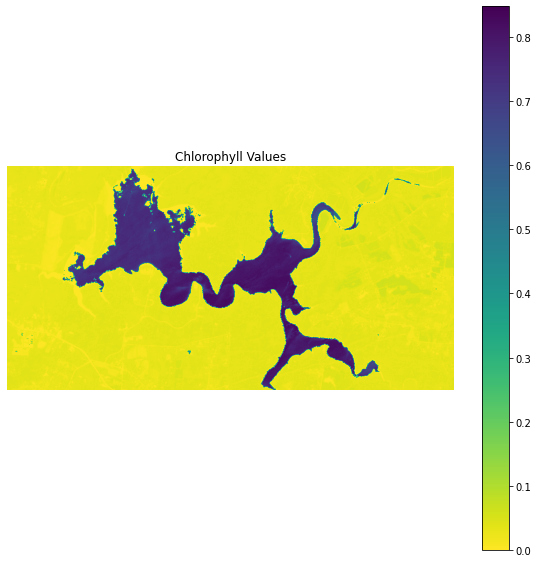

In [35]:
show_band(harshalake, title='Chlorophyll Values', size=(10,10), cmap="viridis_r")

In [36]:
# Define bins that you want, and then classify the data
cha_class_bins = [0, 0.3, 0.6, 0.7, 0.8, 1]
cha_sentinel_class = np.digitize(harshalake, cha_class_bins)

print(np.unique(cha_sentinel_class))

[1 2 3 4 5]


In [37]:
cha_sentinel_class.shape

(1, 500, 1000)

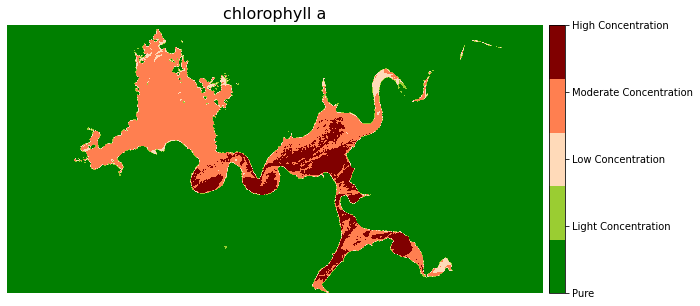

In [38]:
cha_cat_names = ["Pure",
                  "Light Concentration",
                  "Low Concentration",
                  "Moderate Concentration",
                  "High Concentration"]

nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]

nbr_cmap = ListedColormap(nbr_colors)

# Plot the data with a custom legend
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cha_sentinel_class.reshape(cha_sentinel_class.shape[1:3]), cmap=nbr_cmap)

ax.set_title("chlorophyll a",
             fontsize=16)

cbar = ep.colorbar(im)

cbar.set_ticks(np.unique(cha_sentinel_class))
cbar.set_ticklabels(cha_cat_names)

# Turn off ticks
ax.set_axis_off()
plt.show()

*BGA/PC*

Be16FLHGreenRedNIR 

(w658) - (w857 + (w558 -w857))

 Phycocyanin (PC) is an important indicator of CHABs and
water quality risk because PC is a cyanobacteria/blue-green algae (BGA)-
specific pigment


In [39]:
array644

array([[[594, 529, 497, ..., 625, 714, 736],
        [583, 529, 499, ..., 739, 782, 777],
        [532, 514, 524, ..., 666, 725, 742],
        ...,
        [385, 407, 395, ..., 363, 363, 365],
        [369, 387, 371, ..., 360, 362, 371],
        [396, 417, 404, ..., 357, 364, 383]]], dtype=uint16)

In [40]:
a=array644.astype('float64')

In [41]:
a.shape

(1, 10980, 10980)

In [42]:
a

array([[[594., 529., 497., ..., 625., 714., 736.],
        [583., 529., 499., ..., 739., 782., 777.],
        [532., 514., 524., ..., 666., 725., 742.],
        ...,
        [385., 407., 395., ..., 363., 363., 365.],
        [369., 387., 371., ..., 360., 362., 371.],
        [396., 417., 404., ..., 357., 364., 383.]]])

In [43]:
array857

array([[[3707, 3815, 3849, ..., 2721, 2911, 2933],
        [3748, 3832, 3853, ..., 3069, 3117, 3133],
        [3856, 3890, 3851, ..., 3247, 3282, 3257],
        ...,
        [2690, 2479, 2675, ..., 3328, 3564, 3751],
        [2509, 2779, 2772, ..., 3369, 3437, 3658],
        [3163, 3109, 3072, ..., 3518, 3765, 3837]]], dtype=uint16)

In [44]:
b=array644.astype('float64')

In [45]:
b.shape

(1, 10980, 10980)

In [46]:
b

array([[[594., 529., 497., ..., 625., 714., 736.],
        [583., 529., 499., ..., 739., 782., 777.],
        [532., 514., 524., ..., 666., 725., 742.],
        ...,
        [385., 407., 395., ..., 363., 363., 365.],
        [369., 387., 371., ..., 360., 362., 371.],
        [396., 417., 404., ..., 357., 364., 383.]]])

In [47]:
array529

array([[[847, 823, 761, ..., 828, 901, 893],
        [830, 804, 768, ..., 894, 909, 899],
        [790, 778, 792, ..., 835, 898, 889],
        ...,
        [688, 709, 697, ..., 664, 665, 658],
        [683, 705, 705, ..., 655, 664, 672],
        [723, 729, 742, ..., 663, 660, 683]]], dtype=uint16)

In [48]:
c=array529.astype('float64')

In [49]:
c.shape

(1, 10980, 10980)

In [50]:
c

array([[[847., 823., 761., ..., 828., 901., 893.],
        [830., 804., 768., ..., 894., 909., 899.],
        [790., 778., 792., ..., 835., 898., 889.],
        ...,
        [688., 709., 697., ..., 664., 665., 658.],
        [683., 705., 705., ..., 655., 664., 672.],
        [723., 729., 742., ..., 663., 660., 683.]]])

In [51]:
pca=((a)-(b+(c - b)))

In [52]:
pca

array([[[-253., -294., -264., ..., -203., -187., -157.],
        [-247., -275., -269., ..., -155., -127., -122.],
        [-258., -264., -268., ..., -169., -173., -147.],
        ...,
        [-303., -302., -302., ..., -301., -302., -293.],
        [-314., -318., -334., ..., -295., -302., -301.],
        [-327., -312., -338., ..., -306., -296., -300.]]])

In [53]:
min=numpy.amin(pca)
min

-11241.0

In [54]:
max=numpy.amax(pca)
max

8653.0

In [55]:
pca

array([[[-253., -294., -264., ..., -203., -187., -157.],
        [-247., -275., -269., ..., -155., -127., -122.],
        [-258., -264., -268., ..., -169., -173., -147.],
        ...,
        [-303., -302., -302., ..., -301., -302., -293.],
        [-314., -318., -334., ..., -295., -302., -301.],
        [-327., -312., -338., ..., -306., -296., -300.]]])

In [56]:
pca.shape

(1, 10980, 10980)

In [57]:
pca_hl=[]

In [58]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      pca_hl.append(pca[i][k][4500:5500])

In [59]:
pca_hl=numpy.array(pca_hl)

In [60]:
pca_hl.shape

(500, 1000)

In [61]:
for i in range(len(pca_hl)):
  for j in range(len(pca_hl[i])):
    pca_hl[i][j]=((pca_hl[i][j]-min)/(max-min))

In [62]:
pca_hl=numpy.array(pca_hl)

In [63]:
pca_hl.shape

(500, 1000)

In [64]:
harshalake_pca=[pca_hl]
harshalake_pca=numpy.array(harshalake_pca)
harshalake_pca

array([[[0.55021615, 0.54941188, 0.54825576, ..., 0.55519252,
         0.55413693, 0.55262893],
        [0.55016588, 0.55066854, 0.55041721, ..., 0.55388559,
         0.55574545, 0.55413693],
        [0.55011561, 0.55026641, 0.55001508, ..., 0.55112094,
         0.55489092, 0.55644918],
        ...,
        [0.55036694, 0.54996481, 0.55107067, ..., 0.5468483 ,
         0.54880869, 0.54880869],
        [0.5519252 , 0.55142254, 0.55122147, ..., 0.54704936,
         0.54735096, 0.54760229],
        [0.55142254, 0.54926108, 0.54926108, ..., 0.54730069,
         0.54795416, 0.54895949]]])

In [65]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

PCA Values Shape:  (1, 500, 1000)


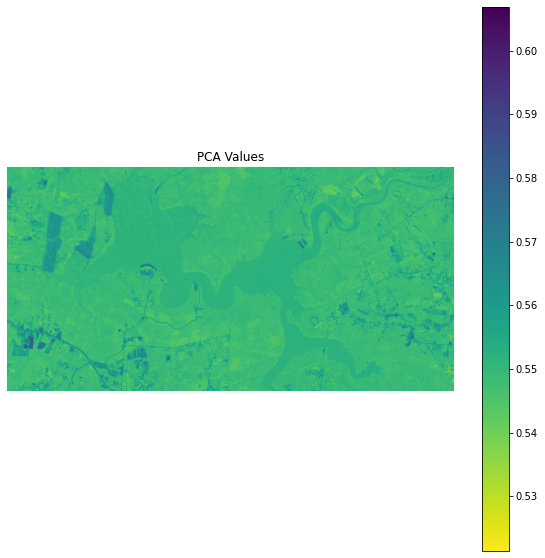

In [66]:
show_band(harshalake_pca, title='PCA Values', size=(10,10), cmap="viridis_r")

*TurbBow06RedOverGreen* 

turbidity (w658 / w558)

Turbidity is the relative clarity of water, and
specifically it is the backscattering caused by suspended materials in the
water. As such, turbidity is not a measure of CHABs directly but has been
shown to be highly correlated with chlorophyll and BGA/PC
concentrations in highly productive eutrophic water bodies and can be an
early warning sign


In [67]:
turbidity=array644/array529

In [68]:
turbidity

array([[[0.7012987 , 0.64277035, 0.65308804, ..., 0.75483092,
         0.79245283, 0.82418813],
        [0.70240964, 0.6579602 , 0.64973958, ..., 0.82662192,
         0.86028603, 0.86429366],
        [0.67341772, 0.66066838, 0.66161616, ..., 0.79760479,
         0.80734967, 0.83464567],
        ...,
        [0.55959302, 0.57404795, 0.56671449, ..., 0.54668675,
         0.54586466, 0.55471125],
        [0.54026354, 0.54893617, 0.52624113, ..., 0.54961832,
         0.54518072, 0.55208333],
        [0.54771784, 0.57201646, 0.54447439, ..., 0.53846154,
         0.55151515, 0.56076135]]])

In [69]:
turbidity_hl=[]

In [70]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      turbidity_hl.append(turbidity[i][k][4500:5500])

In [71]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

In [72]:
numpy.amin(turbidity_hl)

0.42764976958525347

In [73]:
numpy.amax(turbidity_hl)

2.0778688524590163

In [74]:
turbidity_hl=numpy.array(turbidity_hl)

Turbidity Values Shape:  (500, 1000)


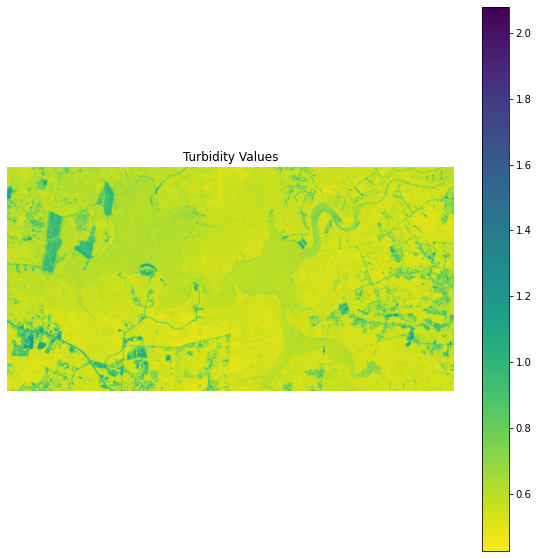

In [75]:
show_band(turbidity_hl, title='Turbidity Values', size=(10,10), cmap="viridis_r")